# Halo mass function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compos import const, growthfactor
from MgIIabs.model import halomassfunc
from astropy.units.astrophys import M_sun,Mpc
from scipy.optimize import minimize

In [7]:
const.initializecosmo()
z=0

M = 1e12/const.cosmo['h']
rho_crit0 = 2.776992e12*const.cosmo['h']**2 #M_sun/Mpc^3
rho_m = const.cosmo['omega_0']*rho_crit0*(1+z)**3

R = (3*M/(4*np.pi*rho_m))**(1/3)
sigma = np.sqrt(halomassfunc.psvariance(R,high=20/R)[0])
f = halomassfunc.f_of_sigma(sigma)
-f*R/3*halomassfunc.dlogsigma_dr(R)

0.038139930261286238

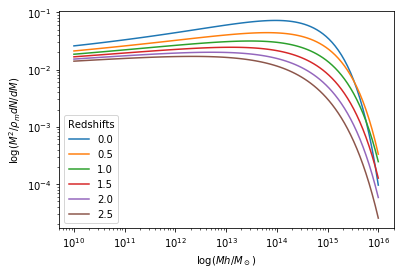

In [2]:
M = 10**np.linspace(10,16,100)*M_sun #Units of h^-1 M_sun
plots = []
for z in np.linspace(0,2.5,6):
    growthf = growthfactor.growfunc_z(z)
    dndM = [halomassfunc.dNdM(mass,z,growthf=growthf) for mass in M]
    plots.append(plt.loglog(M,dndM,label='{:1.1f}'.format(z))[0])
plt.legend(handles=plots,title='Redshifts')
plt.ylabel(r'$\log (M^2/\rho_m dN/dM)$')
plt.xlabel(r'$\log(Mh/M_\odot)$')
plt.show()